In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
pwd

'c:\\Users\\Myles\\Documents\\GitHub\\Project2'

In [3]:
csvpath = Path('/Users/Myles/Documents/GitHub/Project2/ESG_Data_Cleaned.csv')

In [4]:
esg_df = pd.read_csv(csvpath, index_col='Year')

In [5]:
esg_df = esg_df.drop(['Agriculture, forestry, and fishing, value added (% of GDP)','Mortality rate, under-5 (per 1,000 live births)','Country Code'],axis=1)
esg_df

,Country Name,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Population ages 65 and above (% of total population),CO2 emissions (metric tons per capita)
Year,,,,,
1960,Australia,3.453000,70.817073,8.610618,8.582937
1960,Caribbean small states,5.600340,62.746306,4.136085,1.401336
1960,Central African Republic,5.840000,36.249000,4.998109,0.058607
1960,Central Europe and the Baltics,2.497094,67.821389,7.214899,5.228903
1960,East Asia & Pacific,5.393637,48.429121,3.865390,1.182973
...,...,...,...,...,...
2018,Latin America & Caribbean,2.027393,75.440849,8.443344,2.637363
2018,Middle East & North Africa,2.808926,74.088833,5.182127,5.638657
2018,North America,1.706038,78.986791,15.952731,15.270876


In [6]:
esg_df = esg_df.dropna()

In [7]:
esg_df.head()

,Country Name,"Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Population ages 65 and above (% of total population),CO2 emissions (metric tons per capita)
Year,,,,,
1960,Australia,3.453000,70.817073,8.610618,8.582937
1960,Caribbean small states,5.600340,62.746306,4.136085,1.401336
1960,Central African Republic,5.840000,36.249000,4.998109,0.058607
1960,Central Europe and the Baltics,2.497094,67.821389,7.214899,5.228903
1960,East Asia & Pacific,5.393637,48.429121,3.865390,1.182973


In [8]:
# new_esg = esg_df.copy()

# #Transform data
# new_esg['Fertility rate, total (births per woman)']=new_esg['Fertility rate, total (births per woman)']/100
# new_esg['Life expectancy at birth, total (years)']=new_esg['Life expectancy at birth, total (years)']/100
# new_esg['Population ages 65 and above (% of total population)'] = new_esg['Population ages 65 and above (% of total population)']/100

In [9]:
# new_esg

In [10]:
# Create a function to filter ESG data by location
def location_filter(location_name):
    new_df = esg_df[esg_df['Country Name']==f'{location_name}']
    return(new_df)

In [11]:
australia_df=[]
caribbean_small_sts_df = []
central_african_republic_df = []
central_europe_baltics_df = []
east_asia_pacific_df = []
europe_central_asia_df = []
latin_america_caribbean_df = []
middle_east_north_africa_df = []
north_america_df = []
sub_saharan_africa_df = []
world_df = []

australia_df = location_filter('Australia')
caribbean_small_sts_df = location_filter('Caribbean small states')
central_african_republic_df = location_filter('Central African Republic')
central_europe_baltics_df = location_filter('Central Europe and the Baltics')
east_asia_pacific_df = location_filter('East Asia & Pacific')
europe_central_asia_df = location_filter('Europe Central Asia')
latin_america_caribbean_df = location_filter('Latin America & Caribbean')
middle_east_north_africa_df = location_filter('Middle East & North Africa')
north_america_df = location_filter('North America')
sub_saharan_africa_df = location_filter('Sub-Saharan Africa')
world_df = location_filter('World')


## Australia Analysis

In [12]:
#Separate the features (X) from the Target (Y)

#Separate the features (X) from the Target (Y)
australia_y = australia_df['CO2 emissions (metric tons per capita)']
australia_X = australia_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)




In [13]:
#Split our data into training and testing
from sklearn.model_selection import train_test_split
australia_X_train, australia_X_test, australia_y_train, australia_y_test = train_test_split(australia_X,
                                                    australia_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(australia_X_train.shape, australia_X_test.shape, australia_y_train.shape, australia_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [14]:
from sklearn.preprocessing import StandardScaler
#Initiate StandardScaler Instance. Fit the data and scale the data

scaler = StandardScaler()
australia_X_scaler = scaler.fit(australia_X_train)

australia_X_train_scaled = australia_X_scaler.transform(australia_X_train)
australia_X_test_scaled = australia_X_scaler.transform(australia_X_test)

#y_train_scaled = scaler.transform(y_train)
#y_test_scaled = scaler.transform(y_test)


In [15]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model and fit it to the data

australia_model = LinearRegression()
australia_model.fit(australia_X_train_scaled, australia_y_train)

LinearRegression()

In [16]:
# Make predictions using the Scaled Testing Data

australia_predicted_y_values = australia_model.predict(australia_X_test_scaled)


In [17]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
australia_Results = australia_y_test.to_frame()
australia_Results["Predicted Emissions"] = australia_predicted_y_values
australia_Results = australia_Results.sort_index()

In [18]:
australia_Results.head()

,CO2 emissions (metric tons per capita),Predicted Emissions
Year,,
1960,8.582937,9.170435
1963,9.226440,9.435020
1965,10.622321,9.946754
1968,11.210168,10.664943
1972,11.951632,11.554472


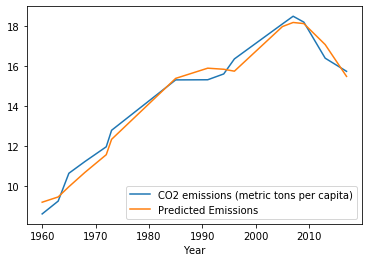

In [19]:
# Plot the Results
australia_Results.plot()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 

australia_mse = mean_squared_error(
    australia_Results["CO2 emissions (metric tons per capita)"],
    australia_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
australia_rmse = np.sqrt(australia_mse)
print(f"Australia Out-of-Sample Root Mean Squared Error (RMSE): {australia_rmse}")

Australia Out-of-Sample Root Mean Squared Error (RMSE): 0.4423292660859765


In [21]:
# Construct a dataframe using just the "y" training data:
australia_in_sample_results = australia_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
australia_in_sample_results["In-sample Predictions"] = australia_model.predict(australia_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
australia_in_sample_mse = mean_squared_error(
    australia_in_sample_results["CO2 emissions (metric tons per capita)"],
    australia_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
australia_in_sample_rmse = np.sqrt(australia_in_sample_mse)
print(f"Australia In-sample Root Mean Squared Error (RMSE): {australia_in_sample_rmse}")

Australia In-sample Root Mean Squared Error (RMSE): 0.6002202472627489


## Caribbean Small States Analysis

In [22]:
#Separate the features (X) from the Target (Y)

#Separate the features (X) from the Target (Y)
caribbean_small_sts_y = caribbean_small_sts_df['CO2 emissions (metric tons per capita)']
caribbean_small_sts_X = caribbean_small_sts_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)




In [23]:
#Split our data into training and testing
from sklearn.model_selection import train_test_split
caribbean_small_sts_X_train, caribbean_small_sts_X_test, caribbean_small_sts_y_train, caribbean_small_sts_y_test = train_test_split(caribbean_small_sts_X,
                                                    caribbean_small_sts_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(caribbean_small_sts_X_train.shape, caribbean_small_sts_X_test.shape, caribbean_small_sts_y_train.shape, caribbean_small_sts_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [24]:
from sklearn.preprocessing import StandardScaler
#Initiate StandardScaler Instance. Fit the data and scale the data

scaler = StandardScaler()
caribbean_small_sts_X_scaler = scaler.fit(caribbean_small_sts_X_train)

caribbean_small_sts_X_train_scaled = caribbean_small_sts_X_scaler.transform(caribbean_small_sts_X_train)
caribbean_small_sts_X_test_scaled = caribbean_small_sts_X_scaler.transform(caribbean_small_sts_X_test)

#y_train_scaled = scaler.transform(y_train)
#y_test_scaled = scaler.transform(y_test)

In [25]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model and fit it to the data

caribbean_small_sts_model = LinearRegression()
caribbean_small_sts_model.fit(caribbean_small_sts_X_train_scaled, caribbean_small_sts_y_train)

LinearRegression()

In [26]:
# Make predictions using the Scaled Testing Data

caribbean_small_sts_predicted_y_values = caribbean_small_sts_model.predict(caribbean_small_sts_X_test_scaled)

In [27]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
caribbean_small_sts_Results = caribbean_small_sts_y_test.to_frame()
caribbean_small_sts_Results["Predicted Emissions"] = caribbean_small_sts_predicted_y_values
caribbean_small_sts_Results = caribbean_small_sts_Results.sort_index()

In [28]:
caribbean_small_sts_Results.head()

,CO2 emissions (metric tons per capita),Predicted Emissions
Year,,
1960,1.401336,5.639276
1963,1.350230,3.299553
1965,2.601912,2.719553
1968,2.938123,2.827455
1972,5.103338,4.012930


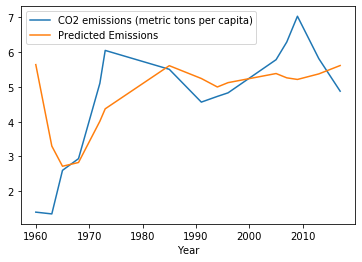

In [29]:
caribbean_small_sts_Results.plot()

In [30]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
caribbean_small_sts_mse = mean_squared_error(
    caribbean_small_sts_Results["CO2 emissions (metric tons per capita)"],
    caribbean_small_sts_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
caribbean_small_sts_rmse = np.sqrt(caribbean_small_sts_mse)
print(f"caribbean_small_sts Out-of-Sample Root Mean Squared Error (RMSE): {caribbean_small_sts_rmse}")

caribbean_small_sts Out-of-Sample Root Mean Squared Error (RMSE): 1.4529896046971096


In [31]:
# Construct a dataframe using just the "y" training data:
caribbean_small_sts_in_sample_results = caribbean_small_sts_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
caribbean_small_sts_in_sample_results["In-sample Predictions"] = caribbean_small_sts_model.predict(caribbean_small_sts_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
caribbean_small_sts_in_sample_mse = mean_squared_error(
    caribbean_small_sts_in_sample_results["CO2 emissions (metric tons per capita)"],
    caribbean_small_sts_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
caribbean_small_sts_in_sample_rmse = np.sqrt(caribbean_small_sts_in_sample_mse)
print(f"caribbean_small_sts In-sample Root Mean Squared Error (RMSE): {caribbean_small_sts_in_sample_rmse}")

caribbean_small_sts In-sample Root Mean Squared Error (RMSE): 0.7984388188730399


## Central African Republic Analysis

In [32]:
#Separate the features (X) from the Target (Y)
central_african_republic_y = central_african_republic_df['CO2 emissions (metric tons per capita)']
central_african_republic_X = central_african_republic_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)



In [33]:
#Split our data into training and testing

central_african_republic_X_train, central_african_republic_X_test, central_african_republic_y_train, central_african_republic_y_test = train_test_split(central_african_republic_X,
                                                    central_african_republic_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(central_african_republic_X_train.shape, central_african_republic_X_test.shape, central_african_republic_y_train.shape, central_african_republic_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [34]:

#Fit the data and scale the data

scaler = StandardScaler()
central_african_republic_X_scaler = scaler.fit(central_african_republic_X_train)

central_african_republic_X_train_scaled = central_african_republic_X_scaler.transform(central_african_republic_X_train)
central_african_republic_X_test_scaled = central_african_republic_X_scaler.transform(central_african_republic_X_test)

#y_train_scaled = scaler.transform(y_train)
#y_test_scaled = scaler.transform(y_test)



In [35]:
# Create a Linear Regression model and fit it to the data

central_african_republic_model = LinearRegression()
central_african_republic_model.fit(central_african_republic_X_train_scaled, central_african_republic_y_train)



LinearRegression()

In [36]:
# Make predictions using the Scaled Testing Data

central_african_republic_predicted_y_values = central_african_republic_model.predict(central_african_republic_X_test_scaled)



In [37]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
central_african_republic_Results = central_african_republic_y_test.to_frame()
central_african_republic_Results["Predicted Emissions"] = central_african_republic_predicted_y_values
central_african_republic_Results = central_african_republic_Results.sort_index()

central_african_republic_Results.head()



,CO2 emissions (metric tons per capita),Predicted Emissions
Year,,
1960,0.058607,0.060379
1963,0.046436,0.061577
1965,0.053673,0.062442
1968,0.105120,0.063471
1972,0.090311,0.064647


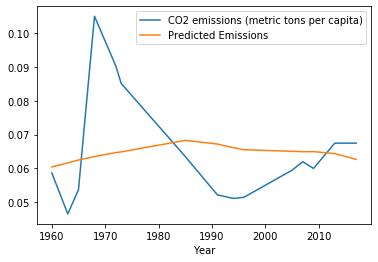

In [38]:
# Plot the results
central_african_republic_Results.plot()



In [39]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
central_african_republic_mse = mean_squared_error(
    central_african_republic_Results["CO2 emissions (metric tons per capita)"],
    central_african_republic_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
central_african_republic_rmse = np.sqrt(central_african_republic_mse)
print(f"central_african_republic Out-of-Sample Root Mean Squared Error (RMSE): {central_african_republic_rmse}")



central_african_republic Out-of-Sample Root Mean Squared Error (RMSE): 0.016101802569023906


In [40]:
# Construct a dataframe using just the "y" training data:
central_african_republic_in_sample_results = central_african_republic_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
central_african_republic_in_sample_results["In-sample Predictions"] = central_african_republic_model.predict(central_african_republic_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
central_african_republic_in_sample_mse = mean_squared_error(
    central_african_republic_in_sample_results["CO2 emissions (metric tons per capita)"],
    central_african_republic_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
central_african_republic_in_sample_rmse = np.sqrt(central_african_republic_in_sample_mse)
print(f"central_african_republic In-sample Root Mean Squared Error (RMSE): {central_african_republic_in_sample_rmse}")

central_african_republic In-sample Root Mean Squared Error (RMSE): 0.01537821963285854


## Central Europe Baltics Analysis

In [41]:
#Separate the features (X) from the Target (Y)
central_europe_baltics_y = central_europe_baltics_df['CO2 emissions (metric tons per capita)']
central_europe_baltics_X = central_europe_baltics_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [42]:
#Split our data into training and testing

central_europe_baltics_X_train, central_europe_baltics_X_test, central_europe_baltics_y_train, central_europe_baltics_y_test = train_test_split(central_europe_baltics_X,
                                                    central_europe_baltics_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(central_europe_baltics_X_train.shape, central_europe_baltics_X_test.shape, central_europe_baltics_y_train.shape, central_europe_baltics_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [43]:
#Fit the data and scale the data

scaler = StandardScaler()
central_europe_baltics_X_scaler = scaler.fit(central_europe_baltics_X_train)

central_europe_baltics_X_train_scaled = central_europe_baltics_X_scaler.transform(central_europe_baltics_X_train)
central_europe_baltics_X_test_scaled = central_europe_baltics_X_scaler.transform(central_europe_baltics_X_test)

In [44]:
# Create a Linear Regression model and fit it to the data

central_europe_baltics_model = LinearRegression()
central_europe_baltics_model.fit(central_europe_baltics_X_train_scaled, central_europe_baltics_y_train)

LinearRegression()

In [45]:
# Make predictions using the Scaled Testing Data

central_europe_baltics_predicted_y_values = central_europe_baltics_model.predict(central_europe_baltics_X_test_scaled)


In [46]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
central_europe_baltics_Results = central_europe_baltics_y_test.to_frame()
central_europe_baltics_Results["Predicted Emissions"] = central_europe_baltics_predicted_y_values
central_europe_baltics_Results = central_europe_baltics_Results.sort_index()

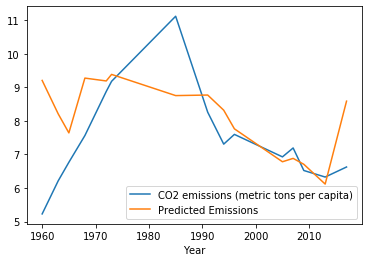

In [47]:
# Plot the results
central_europe_baltics_Results.plot()

In [48]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
central_europe_baltics_mse = mean_squared_error(
    central_europe_baltics_Results["CO2 emissions (metric tons per capita)"],
    central_europe_baltics_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
central_europe_baltics_rmse = np.sqrt(central_europe_baltics_mse)
print(f"central_europe_baltics Out-of-Sample Root Mean Squared Error (RMSE): {central_europe_baltics_rmse}")

central_europe_baltics Out-of-Sample Root Mean Squared Error (RMSE): 1.5173883114458235


In [49]:
# Construct a dataframe using just the "y" training data:
central_europe_baltics_in_sample_results = central_europe_baltics_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
central_europe_baltics_in_sample_results["In-sample Predictions"] = central_europe_baltics_model.predict(central_europe_baltics_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
central_europe_baltics_in_sample_mse = mean_squared_error(
    central_europe_baltics_in_sample_results["CO2 emissions (metric tons per capita)"],
    central_europe_baltics_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
central_europe_baltics_in_sample_rmse = np.sqrt(central_europe_baltics_in_sample_mse)
print(f"central_europe_baltics In-sample Root Mean Squared Error (RMSE): {central_europe_baltics_in_sample_rmse}")

central_europe_baltics In-sample Root Mean Squared Error (RMSE): 1.3952788154742561


## East Asia Pacific Analysis

In [50]:
#Separate the features (X) from the Target (Y)
east_asia_pacific_y = east_asia_pacific_df['CO2 emissions (metric tons per capita)']
east_asia_pacific_X = east_asia_pacific_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [51]:
#Split our data into training and testing

east_asia_pacific_X_train, east_asia_pacific_X_test, east_asia_pacific_y_train, east_asia_pacific_y_test = train_test_split(east_asia_pacific_X,
                                                    east_asia_pacific_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(east_asia_pacific_X_train.shape, east_asia_pacific_X_test.shape, east_asia_pacific_y_train.shape, east_asia_pacific_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [52]:
#Fit the data and scale the data

scaler = StandardScaler()
east_asia_pacific_X_scaler = scaler.fit(east_asia_pacific_X_train)

east_asia_pacific_X_train_scaled = east_asia_pacific_X_scaler.transform(east_asia_pacific_X_train)
east_asia_pacific_X_test_scaled = east_asia_pacific_X_scaler.transform(east_asia_pacific_X_test)

In [53]:
# Create a Linear Regression model and fit it to the data

east_asia_pacific_model = LinearRegression()
east_asia_pacific_model.fit(east_asia_pacific_X_train_scaled, east_asia_pacific_y_train)

LinearRegression()

In [54]:
# Make predictions using the Scaled Testing Data

east_asia_pacific_predicted_y_values = east_asia_pacific_model.predict(east_asia_pacific_X_test_scaled)

In [55]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
east_asia_pacific_Results = east_asia_pacific_y_test.to_frame()
east_asia_pacific_Results["Predicted Emissions"] = east_asia_pacific_predicted_y_values
east_asia_pacific_Results = east_asia_pacific_Results.sort_index()

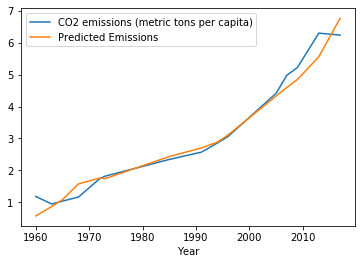

In [56]:
# Plot the results
east_asia_pacific_Results.plot()

In [57]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
east_asia_pacific_mse = mean_squared_error(
    east_asia_pacific_Results["CO2 emissions (metric tons per capita)"],
    east_asia_pacific_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
east_asia_pacific_rmse = np.sqrt(east_asia_pacific_mse)
print(f"east_asia_pacific Out-of-Sample Root Mean Squared Error (RMSE): {east_asia_pacific_rmse}")

east_asia_pacific Out-of-Sample Root Mean Squared Error (RMSE): 0.33699275885100266


In [58]:
# Construct a dataframe using just the "y" training data:
east_asia_pacific_in_sample_results = east_asia_pacific_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
east_asia_pacific_in_sample_results["In-sample Predictions"] = east_asia_pacific_model.predict(east_asia_pacific_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
east_asia_pacific_in_sample_mse = mean_squared_error(
    east_asia_pacific_in_sample_results["CO2 emissions (metric tons per capita)"],
    east_asia_pacific_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
east_asia_pacific_in_sample_rmse = np.sqrt(east_asia_pacific_in_sample_mse)
print(f"east_asia_pacific In-sample Root Mean Squared Error (RMSE): {east_asia_pacific_in_sample_rmse}")

east_asia_pacific In-sample Root Mean Squared Error (RMSE): 0.33777697058824474


## Europe Central Asia Analysis (Cannot be performed)

## Latin America Caribbean Analysis

In [59]:
#Separate the features (X) from the Target (Y)
latin_america_caribbean_y = latin_america_caribbean_df['CO2 emissions (metric tons per capita)']
latin_america_caribbean_X = latin_america_caribbean_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [60]:
#Split our data into training and testing

latin_america_caribbean_X_train, latin_america_caribbean_X_test, latin_america_caribbean_y_train, latin_america_caribbean_y_test = train_test_split(latin_america_caribbean_X,
                                                    latin_america_caribbean_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(latin_america_caribbean_X_train.shape, latin_america_caribbean_X_test.shape, latin_america_caribbean_y_train.shape, latin_america_caribbean_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [61]:
#Fit the data and scale the data

scaler = StandardScaler()
latin_america_caribbean_X_scaler = scaler.fit(latin_america_caribbean_X_train)

latin_america_caribbean_X_train_scaled = latin_america_caribbean_X_scaler.transform(latin_america_caribbean_X_train)
latin_america_caribbean_X_test_scaled = latin_america_caribbean_X_scaler.transform(latin_america_caribbean_X_test)

In [62]:
# Create a Linear Regression model and fit it to the data

latin_america_caribbean_model = LinearRegression()
latin_america_caribbean_model.fit(latin_america_caribbean_X_train_scaled, latin_america_caribbean_y_train)

LinearRegression()

In [63]:
# Make predictions using the Scaled Testing Data

latin_america_caribbean_predicted_y_values = latin_america_caribbean_model.predict(latin_america_caribbean_X_test_scaled)

In [64]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
latin_america_caribbean_Results = latin_america_caribbean_y_test.to_frame()
latin_america_caribbean_Results["Predicted Emissions"] = latin_america_caribbean_predicted_y_values
latin_america_caribbean_Results = latin_america_caribbean_Results.sort_index()

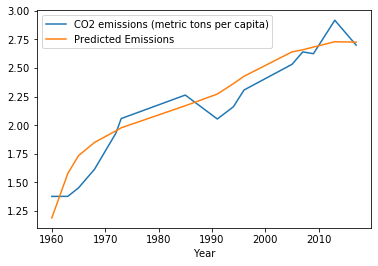

In [65]:
# Plot the results
latin_america_caribbean_Results.plot()

In [66]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
latin_america_caribbean_mse = mean_squared_error(
    latin_america_caribbean_Results["CO2 emissions (metric tons per capita)"],
    latin_america_caribbean_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
latin_america_caribbean_rmse = np.sqrt(latin_america_caribbean_mse)
print(f"latin_america_caribbean Out-of-Sample Root Mean Squared Error (RMSE): {latin_america_caribbean_rmse}")

latin_america_caribbean Out-of-Sample Root Mean Squared Error (RMSE): 0.1592530970355542


In [67]:
# Construct a dataframe using just the "y" training data:
latin_america_caribbean_in_sample_results = latin_america_caribbean_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
latin_america_caribbean_in_sample_results["In-sample Predictions"] = latin_america_caribbean_model.predict(latin_america_caribbean_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
latin_america_caribbean_in_sample_mse = mean_squared_error(
    latin_america_caribbean_in_sample_results["CO2 emissions (metric tons per capita)"],
    latin_america_caribbean_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
latin_america_caribbean_in_sample_rmse = np.sqrt(latin_america_caribbean_in_sample_mse)
print(f"latin_america_caribbean In-sample Root Mean Squared Error (RMSE): {latin_america_caribbean_in_sample_rmse}")

latin_america_caribbean In-sample Root Mean Squared Error (RMSE): 0.17035597330293073


## Middle East North Africa Analysis

In [68]:
#Separate the features (X) from the Target (Y)
middle_east_north_africa_y = middle_east_north_africa_df['CO2 emissions (metric tons per capita)']
middle_east_north_africa_X = middle_east_north_africa_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [69]:
#Split our data into training and testing

middle_east_north_africa_X_train, middle_east_north_africa_X_test, middle_east_north_africa_y_train, middle_east_north_africa_y_test = train_test_split(middle_east_north_africa_X,
                                                    middle_east_north_africa_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(middle_east_north_africa_X_train.shape, middle_east_north_africa_X_test.shape, middle_east_north_africa_y_train.shape, middle_east_north_africa_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [70]:
#Fit the data and scale the data

scaler = StandardScaler()
middle_east_north_africa_X_scaler = scaler.fit(middle_east_north_africa_X_train)

middle_east_north_africa_X_train_scaled = middle_east_north_africa_X_scaler.transform(middle_east_north_africa_X_train)
middle_east_north_africa_X_test_scaled = middle_east_north_africa_X_scaler.transform(middle_east_north_africa_X_test)

In [71]:
# Create a Linear Regression model and fit it to the data

middle_east_north_africa_model = LinearRegression()
middle_east_north_africa_model.fit(middle_east_north_africa_X_train_scaled, middle_east_north_africa_y_train)

LinearRegression()

In [72]:
# Make predictions using the Scaled Testing Data

middle_east_north_africa_predicted_y_values = middle_east_north_africa_model.predict(middle_east_north_africa_X_test_scaled)

In [73]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
middle_east_north_africa_Results = middle_east_north_africa_y_test.to_frame()
middle_east_north_africa_Results["Predicted Emissions"] = middle_east_north_africa_predicted_y_values
middle_east_north_africa_Results = middle_east_north_africa_Results.sort_index()

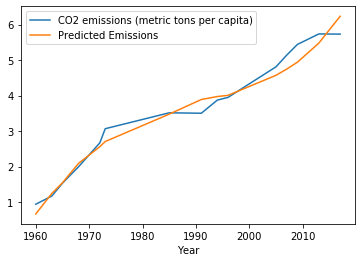

In [74]:
# Plot the results
middle_east_north_africa_Results.plot()

In [75]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
middle_east_north_africa_mse = mean_squared_error(
    middle_east_north_africa_Results["CO2 emissions (metric tons per capita)"],
    middle_east_north_africa_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
middle_east_north_africa_rmse = np.sqrt(middle_east_north_africa_mse)
print(f"middle_east_north_africa Out-of-Sample Root Mean Squared Error (RMSE): {middle_east_north_africa_rmse}")

middle_east_north_africa Out-of-Sample Root Mean Squared Error (RMSE): 0.28024292777114906


In [76]:
# Construct a dataframe using just the "y" training data:
middle_east_north_africa_in_sample_results = middle_east_north_africa_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
middle_east_north_africa_in_sample_results["In-sample Predictions"] = middle_east_north_africa_model.predict(middle_east_north_africa_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
middle_east_north_africa_in_sample_mse = mean_squared_error(
    middle_east_north_africa_in_sample_results["CO2 emissions (metric tons per capita)"],
    middle_east_north_africa_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
middle_east_north_africa_in_sample_rmse = np.sqrt(middle_east_north_africa_in_sample_mse)
print(f"middle_east_north_africa In-sample Root Mean Squared Error (RMSE): {middle_east_north_africa_in_sample_rmse}")

middle_east_north_africa In-sample Root Mean Squared Error (RMSE): 0.24824331699196778


## North America Analysis

In [77]:
#Separate the features (X) from the Target (Y)
north_america_y = north_america_df['CO2 emissions (metric tons per capita)']
north_america_X = north_america_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [78]:
#Split our data into training and testing

north_america_X_train, north_america_X_test, north_america_y_train, north_america_y_test = train_test_split(north_america_X,
                                                    north_america_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(north_america_X_train.shape, north_america_X_test.shape, north_america_y_train.shape, north_america_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [79]:
#Fit the data and scale the data

scaler = StandardScaler()
north_america_X_scaler = scaler.fit(north_america_X_train)

north_america_X_train_scaled = north_america_X_scaler.transform(north_america_X_train)
north_america_X_test_scaled = north_america_X_scaler.transform(north_america_X_test)

In [80]:
# Create a Linear Regression model and fit it to the data

north_america_model = LinearRegression()
north_america_model.fit(north_america_X_train_scaled, north_america_y_train)

LinearRegression()

In [81]:
# Make predictions using the Scaled Testing Data

north_america_predicted_y_values = north_america_model.predict(north_america_X_test_scaled)

In [82]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
north_america_Results = north_america_y_test.to_frame()
north_america_Results["Predicted Emissions"] = north_america_predicted_y_values
north_america_Results = north_america_Results.sort_index()

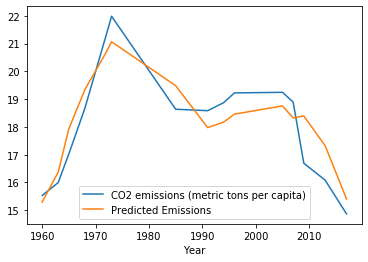

In [83]:
# Plot the results
north_america_Results.plot()

In [84]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
north_america_mse = mean_squared_error(
    north_america_Results["CO2 emissions (metric tons per capita)"],
    north_america_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
north_america_rmse = np.sqrt(north_america_mse)
print(f"north_america Out-of-Sample Root Mean Squared Error (RMSE): {north_america_rmse}")

north_america Out-of-Sample Root Mean Squared Error (RMSE): 0.8214365617190695


In [85]:
# Construct a dataframe using just the "y" training data:
north_america_in_sample_results = north_america_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
north_america_in_sample_results["In-sample Predictions"] = north_america_model.predict(north_america_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
north_america_in_sample_mse = mean_squared_error(
    north_america_in_sample_results["CO2 emissions (metric tons per capita)"],
    north_america_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
north_america_in_sample_rmse = np.sqrt(north_america_in_sample_mse)
print(f"north_america In-sample Root Mean Squared Error (RMSE): {north_america_in_sample_rmse}")

north_america In-sample Root Mean Squared Error (RMSE): 0.9400376153524008


## Sub Sahran Africa Analysis

In [86]:
#Separate the features (X) from the Target (Y)
sub_saharan_africa_y = sub_saharan_africa_df['CO2 emissions (metric tons per capita)']
sub_saharan_africa_X = sub_saharan_africa_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [87]:
#Split our data into training and testing

sub_saharan_africa_X_train, sub_saharan_africa_X_test, sub_saharan_africa_y_train, sub_saharan_africa_y_test = train_test_split(sub_saharan_africa_X,
                                                    sub_saharan_africa_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(sub_saharan_africa_X_train.shape, sub_saharan_africa_X_test.shape, sub_saharan_africa_y_train.shape, sub_saharan_africa_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [88]:
#Fit the data and scale the data

scaler = StandardScaler()
sub_saharan_africa_X_scaler = scaler.fit(sub_saharan_africa_X_train)

sub_saharan_africa_X_train_scaled = sub_saharan_africa_X_scaler.transform(sub_saharan_africa_X_train)
sub_saharan_africa_X_test_scaled = sub_saharan_africa_X_scaler.transform(sub_saharan_africa_X_test)


In [89]:
# Create a Linear Regression model and fit it to the data

sub_saharan_africa_model = LinearRegression()
sub_saharan_africa_model.fit(sub_saharan_africa_X_train_scaled, sub_saharan_africa_y_train)

LinearRegression()

In [90]:
# Make predictions using the Scaled Testing Data

sub_saharan_africa_predicted_y_values = sub_saharan_africa_model.predict(sub_saharan_africa_X_test_scaled)

In [91]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
sub_saharan_africa_Results = sub_saharan_africa_y_test.to_frame()
sub_saharan_africa_Results["Predicted Emissions"] = sub_saharan_africa_predicted_y_values
sub_saharan_africa_Results = sub_saharan_africa_Results.sort_index()


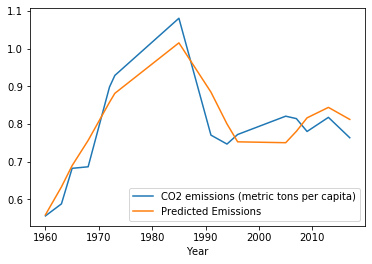

In [92]:
# Plot the results
sub_saharan_africa_Results.plot()

In [93]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
sub_saharan_africa_mse = mean_squared_error(
    sub_saharan_africa_Results["CO2 emissions (metric tons per capita)"],
    sub_saharan_africa_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
sub_saharan_africa_rmse = np.sqrt(sub_saharan_africa_mse)
print(f"sub_saharan_africa Out-of-Sample Root Mean Squared Error (RMSE): {sub_saharan_africa_rmse}")

sub_saharan_africa Out-of-Sample Root Mean Squared Error (RMSE): 0.05283681236599145


In [94]:
# Construct a dataframe using just the "y" training data:
sub_saharan_africa_in_sample_results = sub_saharan_africa_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
sub_saharan_africa_in_sample_results["In-sample Predictions"] = sub_saharan_africa_model.predict(sub_saharan_africa_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
sub_saharan_africa_in_sample_mse = mean_squared_error(
    sub_saharan_africa_in_sample_results["CO2 emissions (metric tons per capita)"],
    sub_saharan_africa_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
sub_saharan_africa_in_sample_rmse = np.sqrt(sub_saharan_africa_in_sample_mse)
print(f"sub_saharan_africa In-sample Root Mean Squared Error (RMSE): {sub_saharan_africa_in_sample_rmse}")

sub_saharan_africa In-sample Root Mean Squared Error (RMSE): 0.051869751271973664


## World Data

In [95]:
#Separate the features (X) from the Target (Y)
world_y = world_df['CO2 emissions (metric tons per capita)']
world_X = world_df.drop(['CO2 emissions (metric tons per capita)', 'Country Name'], axis = 1)

In [96]:
#Split our data into training and testing

world_X_train, world_X_test, world_y_train, world_y_test = train_test_split(world_X,
                                                    world_y,
                                                    test_size = 0.25,
                                                    random_state = 42)
print(world_X_train.shape, world_X_test.shape, world_y_train.shape, world_y_test.shape)

(44, 3) (15, 3) (44,) (15,)


In [97]:
#Fit the data and scale the data

scaler = StandardScaler()
world_X_scaler = scaler.fit(world_X_train)

world_X_train_scaled = world_X_scaler.transform(world_X_train)
world_X_test_scaled = world_X_scaler.transform(world_X_test)

In [98]:
# Create a Linear Regression model and fit it to the data

world_model = LinearRegression()
world_model.fit(world_X_train_scaled, world_y_train)

LinearRegression()

In [99]:
# Make predictions using the Scaled Testing Data

world_predicted_y_values = world_model.predict(world_X_test_scaled)

In [100]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
world_Results = world_y_test.to_frame()
world_Results["Predicted Emissions"] = world_predicted_y_values
world_Results = world_Results.sort_index()

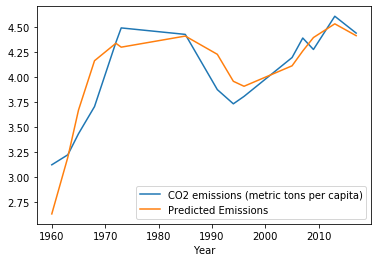

In [101]:
# Plot the results
world_Results.plot()

In [102]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
world_mse = mean_squared_error(
    world_Results["CO2 emissions (metric tons per capita)"],
    world_Results["Predicted Emissions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
world_rmse = np.sqrt(world_mse)
print(f"world Out-of-Sample Root Mean Squared Error (RMSE): {world_rmse}")

world Out-of-Sample Root Mean Squared Error (RMSE): 0.2279415095638008


In [103]:
# Construct a dataframe using just the "y" training data:
world_in_sample_results = world_y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
world_in_sample_results["In-sample Predictions"] = world_model.predict(world_X_train_scaled)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
world_in_sample_mse = mean_squared_error(
    world_in_sample_results["CO2 emissions (metric tons per capita)"],
    world_in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
world_in_sample_rmse = np.sqrt(world_in_sample_mse)
print(f"world In-sample Root Mean Squared Error (RMSE): {world_in_sample_rmse}")

world In-sample Root Mean Squared Error (RMSE): 0.2283700591584777
